# Data Loading AND Data Preprocessing

In [2]:
#Load necessary libraries
import numpy as np
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import os
import zipfile

# Download the dataset and unzip it
dataset_path = '/content/drive/MyDrive/Food/food-101.zip'
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall('/content/Food')


Get Unique Categories


In [5]:
import os
import random
import glob
import pandas as pd
from PIL import Image

# Define the main directory containing food categories
dataset_dir = '/content/Food/food-101/images'

# Get unique categories (folder names)
categories = os.listdir(dataset_dir)
print("Unique Categories:")
print(categories)


Unique Categories:
['tuna_tartare', 'lasagna', 'caesar_salad', 'chicken_curry', 'cheesecake', 'filet_mignon', 'spring_rolls', 'churros', 'paella', 'oysters', 'beet_salad', 'clam_chowder', 'pizza', 'bibimbap', 'pad_thai', 'spaghetti_bolognese', 'pulled_pork_sandwich', 'garlic_bread', 'strawberry_shortcake', 'dumplings', 'sashimi', 'carrot_cake', 'breakfast_burrito', 'baklava', 'chicken_quesadilla', 'omelette', 'gyoza', 'falafel', 'chocolate_cake', 'steak', 'macaroni_and_cheese', 'cannoli', 'seaweed_salad', 'cup_cakes', 'shrimp_and_grits', 'beef_tartare', '.DS_Store', 'mussels', 'crab_cakes', 'poutine', 'caprese_salad', 'donuts', 'ravioli', 'lobster_roll_sandwich', 'baby_back_ribs', 'hamburger', 'grilled_cheese_sandwich', 'huevos_rancheros', 'nachos', 'eggs_benedict', 'ramen', 'french_fries', 'risotto', 'cheese_plate', 'fried_calamari', 'pork_chop', 'sushi', 'ceviche', 'greek_salad', 'edamame', 'fried_rice', 'tiramisu', 'pancakes', 'bread_pudding', 'deviled_eggs', 'chocolate_mousse', 'gr

In [6]:
import os

def remove_ds_store_files(base_folder):
    # Walk through the directory
    for dirpath, dirnames, filenames in os.walk(base_folder):
        for filename in filenames:
            # Check if the file is .DS_Store
            if filename == '.DS_Store':
                file_path = os.path.join(dirpath, filename)
                try:
                    os.remove(file_path)  # Remove the file
                    print(f"Removed: {file_path}")
                except Exception as e:
                    print(f"Error removing {file_path}: {e}")


# Call the function to remove .DS_Store files
remove_ds_store_files(dataset_dir)


Removed: /content/Food/food-101/images/.DS_Store


In [7]:
import os

# Define the dataset directory
dataset_dir = '/content/Food/food-101/images'

# Get a sorted list of all folder names (categories)
all_categories = sorted(os.listdir(dataset_dir))

# Select the first 15 folders (categories)
selected_categories = all_categories[:25]

# Print the selected categories
print("Selected categories:", selected_categories)


Selected categories: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder']


Getting Random Images and Check Their Details

In [8]:
import os
import glob
import random
from PIL import Image


# Initialize the dictionary to store image details
image_details = {}

# Get the list of categories (subdirectory names)
categories = os.listdir(dataset_dir)

# Loop through each category to gather image details
for category in categories:
    category_path = os.path.join(dataset_dir, category)

    # Check if the path is a directory
    if os.path.isdir(category_path):
        # Get all images in the category
        images = glob.glob(os.path.join(category_path, '*.jpg'))

        # Randomly select a few images (e.g., 5)
        random_images = random.sample(images, min(5, len(images)))  # Avoids sampling more than available

        # Store image details and count
        image_details[category] = {
            'image_count': len(images),
            'sample_images': random_images,
            'image_shapes': []
        }

        # Check shape and details of images
        for img_path in random_images:
            try:
                with Image.open(img_path) as img:
                    img_shape = img.size  # (width, height)
                    image_details[category]['image_shapes'].append(img_shape)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

# Convert details to DataFrame for better visualization
import pandas as pd

details_df = pd.DataFrame({
    'Category': [cat for cat in image_details.keys()],
    'Image Count': [info['image_count'] for info in image_details.values()],
    'Sample Images': [info['sample_images'] for info in image_details.values()],
    'Image Shapes': [info['image_shapes'] for info in image_details.values()],
})

# Display the DataFrame
print(details_df[['Category', 'Image Count']])  # Print only the Category and Image Count


           Category  Image Count
0      tuna_tartare         1000
1           lasagna         1000
2      caesar_salad         1000
3     chicken_curry         1000
4        cheesecake         1000
..              ...          ...
96    chicken_wings         1000
97            tacos         1000
98         beignets         1000
99      peking_duck         1000
100  lobster_bisque         1000

[101 rows x 2 columns]


In [9]:
# Convert details to DataFrame for better visualization
details_df = pd.DataFrame({
    'Category': [cat for cat in image_details.keys()],
    'Image Count': [info['image_count'] for info in image_details.values()],
    'Sample Images': [info['sample_images'] for info in image_details.values()],
    'Image Shapes': [info['image_shapes'] for info in image_details.values()],
})

print(details_df)

           Category  Image Count  \
0      tuna_tartare         1000   
1           lasagna         1000   
2      caesar_salad         1000   
3     chicken_curry         1000   
4        cheesecake         1000   
..              ...          ...   
96    chicken_wings         1000   
97            tacos         1000   
98         beignets         1000   
99      peking_duck         1000   
100  lobster_bisque         1000   

                                         Sample Images  \
0    [/content/Food/food-101/images/tuna_tartare/11...   
1    [/content/Food/food-101/images/lasagna/207456....   
2    [/content/Food/food-101/images/caesar_salad/20...   
3    [/content/Food/food-101/images/chicken_curry/1...   
4    [/content/Food/food-101/images/cheesecake/4250...   
..                                                 ...   
96   [/content/Food/food-101/images/chicken_wings/2...   
97   [/content/Food/food-101/images/tacos/3479034.j...   
98   [/content/Food/food-101/images/beignets/

In [10]:
def create_image_dataframe(dataset_dir, selected_categories):
    data = []

    # Iterate through each selected folder (category) in the base folder
    for category in selected_categories:
        category_path = os.path.join(dataset_dir, category)

        # Check if it's a directory
        if os.path.isdir(category_path):
            # Load images from the category folder
            for filename in os.listdir(category_path):
                img_path = os.path.join(category_path, filename)

                # Optional: Filter for specific image extensions
                if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                    data.append({'file_path': img_path, 'label': category})  # Use folder name as label

    # Create DataFrame
    df = pd.DataFrame(data)
    return df


In [11]:
# Create DataFrame with selected categories
df = create_image_dataframe(dataset_dir, selected_categories)

# Display the first 10 entries of the DataFrame
print(df.head(10))


                                           file_path      label
0  /content/Food/food-101/images/apple_pie/116697...  apple_pie
1  /content/Food/food-101/images/apple_pie/237332...  apple_pie
2  /content/Food/food-101/images/apple_pie/238868...  apple_pie
3  /content/Food/food-101/images/apple_pie/188957...  apple_pie
4  /content/Food/food-101/images/apple_pie/232822...  apple_pie
5  /content/Food/food-101/images/apple_pie/288187...  apple_pie
6  /content/Food/food-101/images/apple_pie/874809...  apple_pie
7  /content/Food/food-101/images/apple_pie/325242...  apple_pie
8  /content/Food/food-101/images/apple_pie/171775...  apple_pie
9  /content/Food/food-101/images/apple_pie/328062...  apple_pie


In [12]:
# # Convert string labels to numeric values
# df['label'] = df['label'].astype('category')  # Encode labels

# Define the paths and labels from the DataFrame
X = df['file_path'].values  # Image file paths
y = df['label'].values      # Numeric labels


In [13]:
y

array(['apple_pie', 'apple_pie', 'apple_pie', ..., 'clam_chowder',
       'clam_chowder', 'clam_chowder'], dtype=object)

In [14]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the split results
print("Number of training samples:", len(X_train))
print("Number of validation samples:", len(X_val))

Number of training samples: 20000
Number of validation samples: 5000


In [15]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Fixing train_indices and val_indices
train_indices = df.index[df['file_path'].isin(X_train)].tolist()  # Get indices for training
val_indices = df.index[df['file_path'].isin(X_val)].tolist()  # Get indices for validation


In [16]:
train_indices.__len__()

20000

In [17]:
import os
import glob
import random
from PIL import Image
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and batch size
IMG_SIZE = 96  # Image size for EfficientNet
BATCH_SIZE = 32  # Use the defined batch size

# Create ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Randomly rotate images in the range (degrees, 0 to 40)
    width_shift_range=0.2,  # Randomly translate images horizontally (20% of width)
    height_shift_range=0.2,  # Randomly translate images vertically (20% of height)

)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Normalize only for validation

# Assuming df is your DataFrame and train_indices/val_indices are defined
# Create generators again after defining train_indices and val_indices
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df.iloc[train_indices],  # Use indices from the train split
    x_col='file_path',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images
    batch_size=16,  # Use the defined batch size
    class_mode='categorical',  # Use categorical for multi-class classification
    shuffle=True  # Shuffle data for training
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=df.iloc[val_indices],  # Use indices from the validation split
    x_col='file_path',
    y_col='label',
    target_size=(IMG_SIZE, IMG_SIZE),  # Resize images
    batch_size=32,  # Use the defined batch size
    class_mode='categorical',  # Use categorical for multi-class classification
    shuffle=False  # Don't shuffle validation data
)

# Optional: Print the number of samples to confirm
print(f"Number of training samples: {train_generator.samples}")
print(f"Number of validation samples: {val_generator.samples}")


Found 20000 validated image filenames belonging to 25 classes.
Found 5000 validated image filenames belonging to 25 classes.
Number of training samples: 20000
Number of validation samples: 5000


In [ ]:

val_generator

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


IMG_SIZE = (96, 96, 3)

base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=IMG_SIZE)

# Freeze the base model to prevent updating its weights during the initial training
base_model.trainable = False

# Create the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Pool the feature maps to a single vector
    Dropout(0.4),  # Regularization to prevent overfitting
    Dense(64, activation='relu'),  # Dense layer for learning
    Dropout(0.3),  # Additional dropout for regularization
    Dense(25, activation='softmax')  # Final output layer for 50 classes
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Optimizer with a custom learning rate
    loss='categorical_crossentropy',  # Loss for multi-class classification
    metrics=['accuracy']  # Track accuracy
)




9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
print(df['label'].isnull().sum())  # Check for NaNs
print(df['label'].isna().sum())


0
0


In [23]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [24]:
print(train_generator.image_shape)  # Should print a tuple of integers, e.g., (96, 96, 3)


(96, 96, 3)


In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define your callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
]

# Fit the model using the training and validation generators


# Fit the model
history = model.fit(
    train_generator,

    validation_data=val_generator,

    epochs=30,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 305s 236ms/step - accuracy: 0.1635 - loss: 2.9224 - val_accuracy: 0.4186 - val_loss: 1.9669
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 310s 227ms/step - accuracy: 0.3263 - loss: 2.2628 - val_accuracy: 0.4766 - val_loss: 1.8012
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 285s 227ms/step - accuracy: 0.3645 - loss: 2.1335 - val_accuracy: 0.4964 - val_loss: 1.7535
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 284s 227ms/step - accuracy: 0.3902 - loss: 2.0854 - val_accuracy: 0.5058 - val_loss: 1.6915
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 326s 260ms/step - accuracy: 0.4016 - loss: 2.0314 - val_accuracy: 0.5032 - val_loss: 1.6777
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 285s 227ms/step - accuracy: 0.3990 - loss: 2.0333 - val_accuracy: 0.5086 - val_loss: 1.6687
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 289s 231ms/step - accuracy: 0.4079 - loss: 1.9945 - val_accuracy: 0.5132 - val_loss: 1.6653
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 353s 256ms/step - accuracy: 0.4

**Evaluate**

In [30]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator, steps=157)

# Print the results
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 47s 299ms/step - accuracy: 0.4930 - loss: 1.6917
Validation Loss: 1.6028
Validation Accuracy: 0.5264


In [31]:
# Get predictions
predictions = model.predict(val_generator, steps=157)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels from the validation generator
true_classes = val_generator.classes

# Now you can calculate other metrics, such as classification report or confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))


157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 302ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.23      0.28       200
           1       0.56      0.59      0.57       200
           2       0.47      0.51      0.49       200
           3       0.54      0.64      0.58       200
           4       0.48      0.50      0.49       200
           5       0.42      0.54      0.47       200
           6       0.71      0.71      0.71       200
           7       0.79      0.73      0.76       200
           8       0.40      0.38      0.39       200
           9       0.47      0.41      0.44       200
          10       0.55      0.38      0.45       200
          11       0.50      0.80      0.62       200
          12       0.61      0.48      0.54       200
          13       0.57      0.45      0.50       200
          14       0.64      0.41      0.50       200
          15       0.37      0.39      0.38       200
          16  

**Model** **Tuning**

In [32]:
# Unfreeze the last 20 layers of MobileNetV2
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile the model after unfreezing layers
model.compile(
    optimizer=Adam(learning_rate=0.001),  # You might want to lower the learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define your callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best1_model.keras', monitor='val_loss', save_best_only=True)
]

# Fit the model using the training and validation generators


# Fit the model
history = model.fit(
    train_generator,

    validation_data=val_generator,

    epochs=30,
    callbacks=callbacks,
    verbose=1)

Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 410s 318ms/step - accuracy: 0.3169 - loss: 2.3830 - val_accuracy: 0.1978 - val_loss: 3.5953
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 406s 289ms/step - accuracy: 0.4330 - loss: 1.9818 - val_accuracy: 0.4478 - val_loss: 2.5927
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 381s 288ms/step - accuracy: 0.4661 - loss: 1.8372 - val_accuracy: 0.4276 - val_loss: 3.0130
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 362s 289ms/step - accuracy: 0.4921 - loss: 1.7635 - val_accuracy: 0.5512 - val_loss: 1.9739
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 361s 288ms/step - accuracy: 0.5189 - loss: 1.6846 - val_accuracy: 0.5334 - val_loss: 1.9011
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 378s 285ms/step - accuracy: 0.5411 - loss: 1.6019 - val_accuracy: 0.5194 - val_loss: 2.2540
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 388s 290ms/step - accuracy: 0.5407 - loss: 1.5941 - val_accuracy: 0.5910 - val_loss: 1.7494
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 359s 287ms/step - ac

In [34]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator, steps=157)

# Print the results
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 304ms/step - accuracy: 0.5788 - loss: 1.6544
Validation Loss: 1.6087
Validation Accuracy: 0.6030


In [35]:
# Get predictions
predictions = model.predict(val_generator, steps=157)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels from the validation generator
true_classes = val_generator.classes

# Now you can calculate other metrics, such as classification report or confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))


157/157 ━━━━━━━━━━━━━━━━━━━━ 49s 302ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.47      0.43       200
           1       0.79      0.60      0.69       200
           2       0.59      0.63      0.61       200
           3       0.56      0.73      0.64       200
           4       0.86      0.47      0.61       200
           5       0.62      0.46      0.53       200
           6       0.57      0.87      0.69       200
           7       0.97      0.73      0.84       200
           8       0.44      0.46      0.45       200
           9       0.71      0.39      0.50       200
          10       0.66      0.28      0.40       200
          11       0.56      0.86      0.68       200
          12       0.60      0.69      0.64       200
          13       0.45      0.70      0.55       200
          14       0.74      0.49      0.59       200
          15       0.63      0.46      0.53       200
          16  

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted food: clam_chowder
Estimated calories: 200 kcal


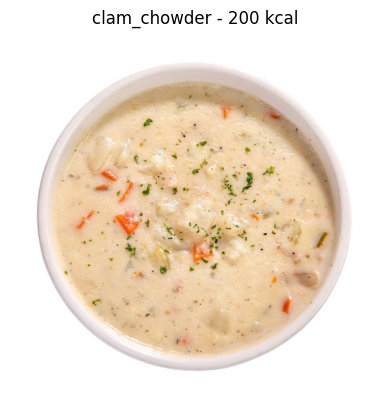

In [39]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2

# # Load the trained model
# model = load_model('best_model.h5')

# Mapping of class indices to average calorie content
calorie_estimates = {
    0: 300,  # apple_pie
    1: 400,  # baby_back_ribs
    2: 250,  # baklava
    3: 150,  # beef_carpaccio
    4: 180,  # beef_tartare
    5: 120,  # beet_salad
    6: 290,  # beignets
    7: 500,  # bibimbap
    8: 350,  # bread_pudding
    9: 600,  # breakfast_burrito
    10: 180, # bruschetta
    11: 150, # caesar_salad
    12: 330, # cannoli
    13: 220, # caprese_salad
    14: 420, # carrot_cake
    15: 200, # ceviche
    16: 250, # cheese_plate
    17: 350, # cheesecake
    18: 400, # chicken_curry
    19: 450, # chicken_quesadilla
    20: 320, # chicken_wings
    21: 400, # chocolate_cake
    22: 350, # chocolate_mousse
    23: 250, # churros
    24: 200  # clam_chowder
}

# Preprocess the input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(96, 96))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

# Class labels
class_labels = [
    'apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare',
    'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito',
    'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake',
    'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla',
    'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder'
]

# Test with an image
img_path = '/content/1.jpg'  # Replace with your image path
preprocessed_img = preprocess_image(img_path)
predictions = model.predict(preprocessed_img)

# Get the predicted class index and label
predicted_class_index = np.argmax(predictions[0])  # Assuming single output softmax
predicted_class_label = class_labels[predicted_class_index]

# Assign the calorie estimate based on the predicted class
calorie_estimate = calorie_estimates[predicted_class_index]

# Display the result
print(f'Predicted food: {predicted_class_label}')
print(f'Estimated calories: {calorie_estimate} kcal')

# Display the image with prediction
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display with matplotlib
plt.imshow(img)
plt.title(f'{predicted_class_label} - {calorie_estimate} kcal')
plt.axis('off')
plt.show()
